### Analysis of real data - power spectral density
    * data has 4 channels from the heterodyning ( frequency mixing), time stamps are slightly different for each channel - large files so don’t read in whole thing (try 10,000 points) - the frequencies are important so the whole time series is not required
    * try and replicate the plot given (power spectral density plot) - apparently the normalisations are difficult and important 
    
Data is on USB - the 3 files with roman/arabic numerals are consecutive.
Begin with the run-43 file
-read in data
-remove header lines 
run-43 has 28929007 lines and the first 7 are info: 28929000 lines of data in 4 columns 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline



#read in 10,000 lines of data         X0   Y0   X1   Y1

#the data is the signal in Volts, but the callibration is not clear yet so take as arbitrary units
#skips the first 7 rows and places the next 10000 in a numpy array

data43 = np.loadtxt(fname = 'dataFiles/run-43', skiprows = 7, max_rows = 5000000)



In [3]:
#time step (seconds)
dt = 0.01
#make a time series the same length as the read-in data
t_s = np.arange(0,len(data43)*dt,dt) 

Text(0, 0.5, 'amplitude')

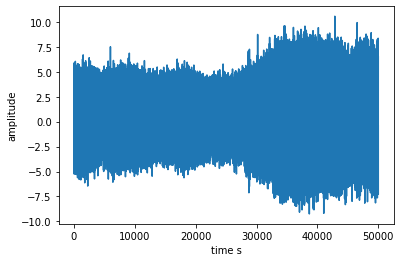

In [4]:
#now plot the first column of the data in time domain
plt.plot(t_s,data43[:,0])
plt.xlabel("time s")
plt.ylabel("amplitude")

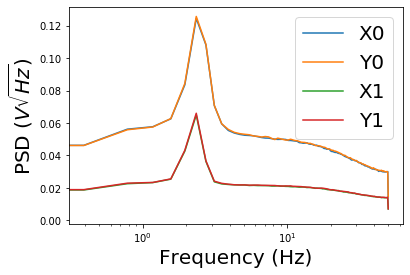

In [5]:
#use signal.welch to estimate power spectral density using Welch’s method
#freqs - Array of sample frequencies.
#psd - Power spectral density or power spectrum of x.

#make dicts for the output of the function
freqs = []
psd = []
for i in range(4):
    f , p = signal.welch(x = data43[:,i], fs = 1/dt)
    freqs.append(f)
    psd.append(p)
    #make y axis scale decibel volts dBV(sqrtHz)
    #p = 20*np.log10(p)
    plt.semilogx(f, p) 
    
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('PSD ($V\sqrt{Hz}$)',fontsize=20)
plt.legend(["X0","Y0","X1","Y1"],fontsize=20)
plt.rcParams["figure.figsize"] = (10,7)





"A voltage decibel (dBV) is a unit of measurement of the ratio of an amount of voltage V to V0 = 1 volt given by the formula 20 log10(V/ V0) = 20 log10(V)."

Text(0, 0.5, 'PSD ($V\\sqrt{Hz}$)')

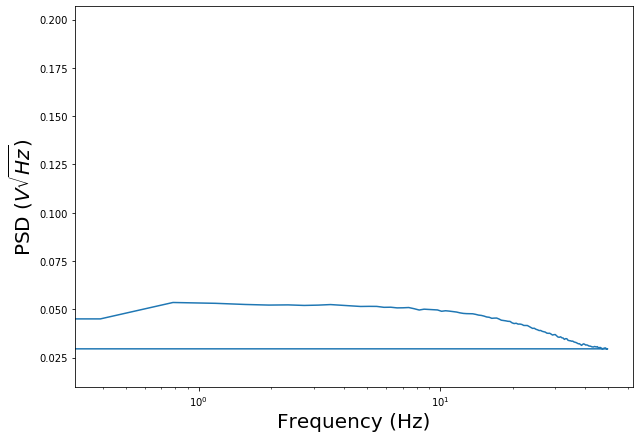

In [6]:
#Try to do 2 sided psd with X+iY 
#start with X0 and Y0

X0 = data43[:,0]
Y0 = data43[:,1]
iY0 = 1j*Y0
#combine x+iy to make complex signal
sig_0 = X0+iY0
#make psd
f_sig0 , p_sig0 = signal.welch(x = sig_0, fs = 1/dt, return_onesided = False)
plt.semilogx(f_sig0, p_sig0) 
plt.xlabel('Frequency (Hz)',fontsize=20)
plt.ylabel('PSD ($V\sqrt{Hz}$)',fontsize=20)
#plt.ylim(0.02,0.05)


Text(0.5, 0, 'Time s')

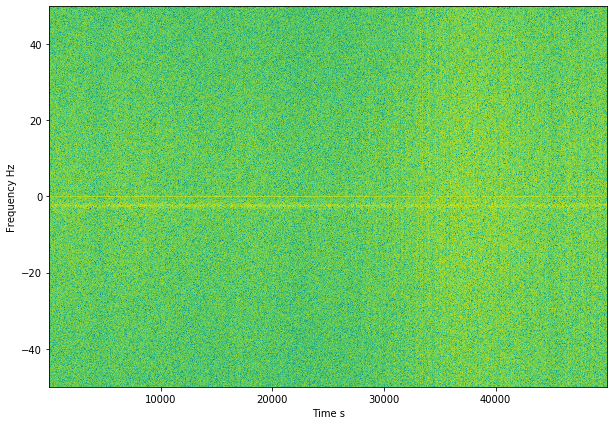

In [7]:
#Differencing
#first make spectrogram of X0+iY0

spectrum, freqs, bins, im = plt.specgram(x=sig_0, Fs=1/dt, NFFT = 1056)
plt.ylabel("Frequency Hz")
plt.xlabel("Time s")





In [8]:
#find average of each row in spectrum

#dimensions
[ydim,xdim] = np.shape(spectrum)

#initialise array
norm_spectrum = np.ones(np.shape(spectrum))

#loop over every row in the array, add the elements in each and divide every element by the average
for row in range(len(spectrum)):
    #sum the rows
    sum_row = np.sum(spectrum[row])
    
    #divide sum by number of elements in row
    ave_row = sum_row/xdim
    
    #divide row by row average to normalise
    norm_row = spectrum[row]/sum_row
    
    norm_spectrum[row,:] = norm_row
#plt.pcolormesh(bins, freqs, 20 * np.log10(norm_spectrum))

np.shape(norm_spectrum)

(1056, 5387)

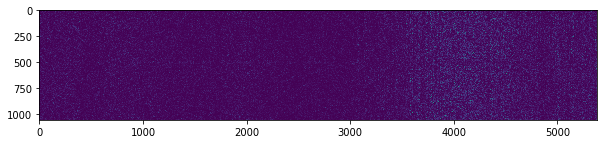

In [9]:
plt.imshow(norm_spectrum)

In [10]:
#array containing the differences between successive columns of spectrogram data in spectrum

#difference array will have one fewer column 

diff_spec = np.ones((ydim, xdim -1))


for i in range(ydim):
    for j in range(xdim-1):
      
        diff_spec[i,j] = norm_spectrum[i,j+1] - norm_spectrum[i,j]
#square differences
diff_spec = np.square(diff_spec)

Text(0, 0.5, 'log(N)')

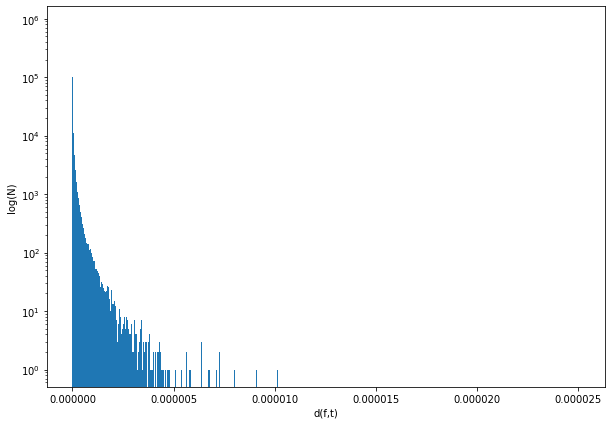

In [11]:
#want to plot all pixels so flatten array to 1D
diff_spec = np.array(diff_spec).flatten()

#Histogram of logN vs diff(f,t) - (N counts)

n, bins, patches = plt.hist(x=diff_spec, bins='auto', log = True)# #color='#0504aa',
                            #alpha=0.7, #rwidth=0.85)
    
plt.xlabel('d(f,t)')
plt.ylabel('log(N)')


